In [2]:
import pandas #provides data structures to quickly analyze data
#Read the train dataset
dataset = pandas.read_csv("F:/GraduateStudy/2016Fall/DatAna/Assignment/7/train.csv") 

print(dataset.shape)

#Drop the first column 'id' since it just has serial numbers. Not useful in the prediction process.
dataset = dataset.iloc[:,1:]

(188318, 132)


In [3]:
# Skewness of the distribution

print(dataset.skew())

# Values close to 0 show less ske
# loss shows the highest skew. 

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


In [16]:
# sepearte the categorical and continous features
cont_columns = []
cat_columns = []

for i in dataset.columns:
    if dataset[i].dtype == 'float':
        cont_columns.append(i)
    elif dataset[i].dtype == 'object':
        cat_columns.append(i)

In [11]:
# log transform the label variable
import numpy as np
dataset['loss'] = np.log1p(dataset['loss'])

In [12]:
import numpy

#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [17]:
#Since we don't have any prior knowledge about this data, we have to make a correlation matrix first.
#So that we can identify the important features and make scatter plot among them
corr = dataset[cont_columns].corr()

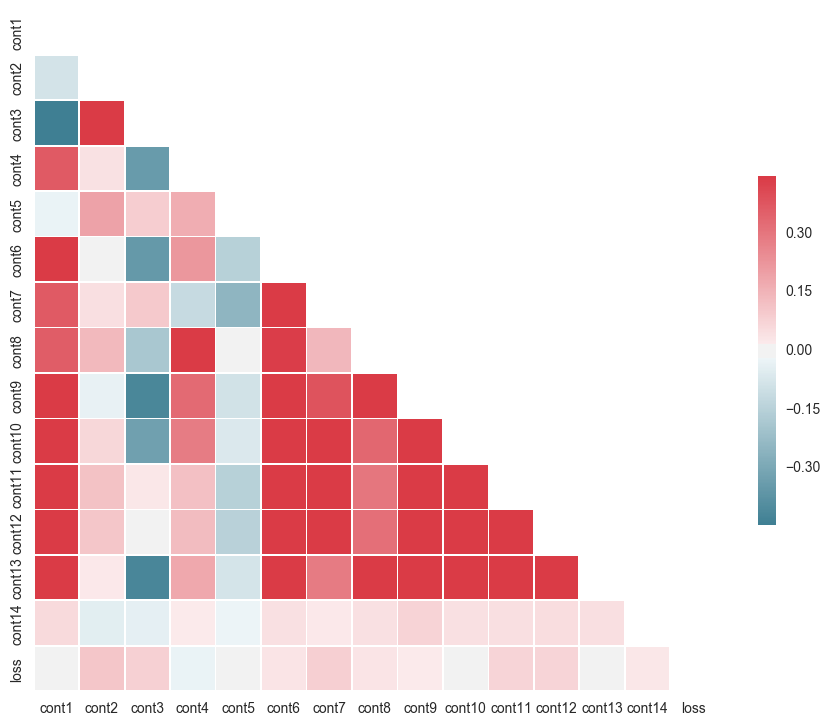

In [18]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

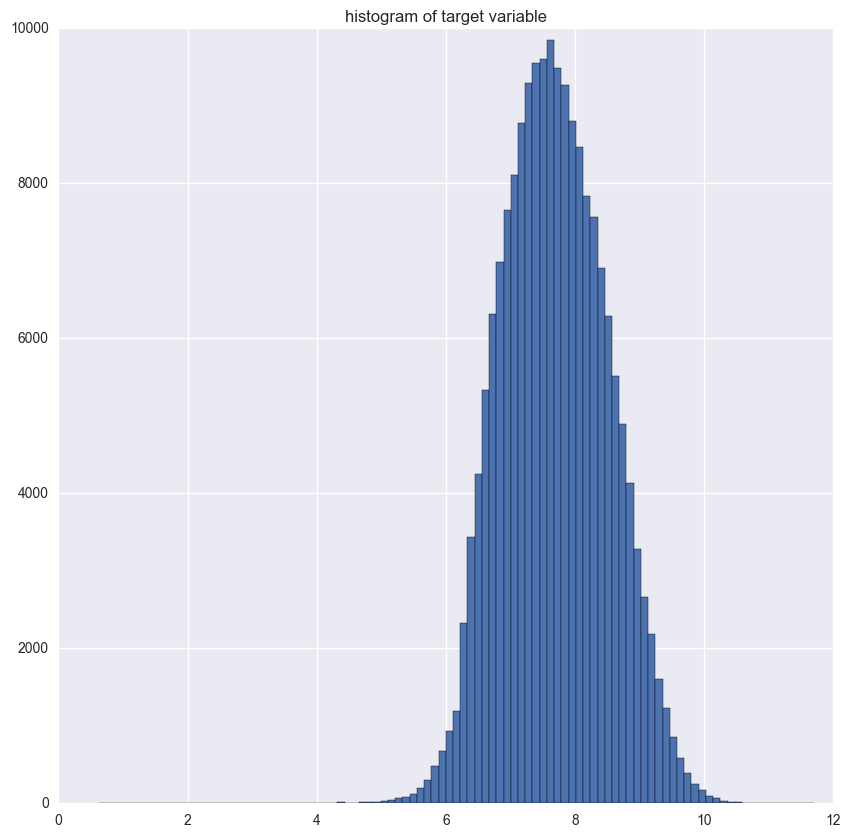

In [14]:
#Histogram of loss data
plt.figure(figsize=(10,10))
plt.hist(dataset.loss, bins=100)
plt.title("histogram of target variable")
plt.show()

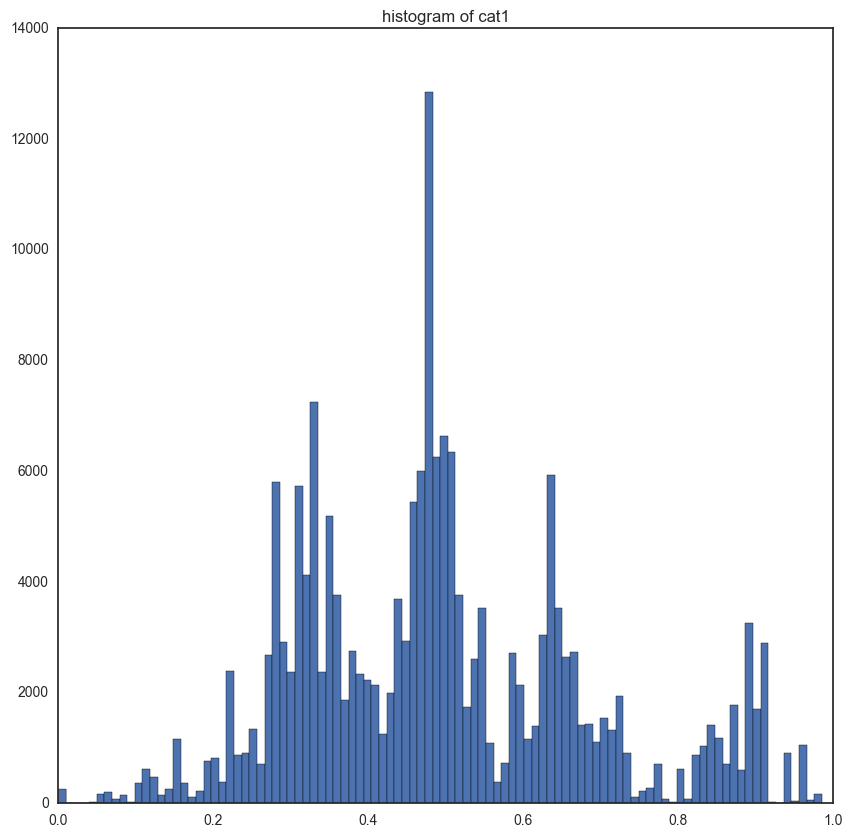

In [21]:
#Histogram of the other continues data 
plt.figure(figsize=(10,10))
plt.hist(dataset.cont1, bins=100)
plt.title("histogram of cat1")
plt.show()

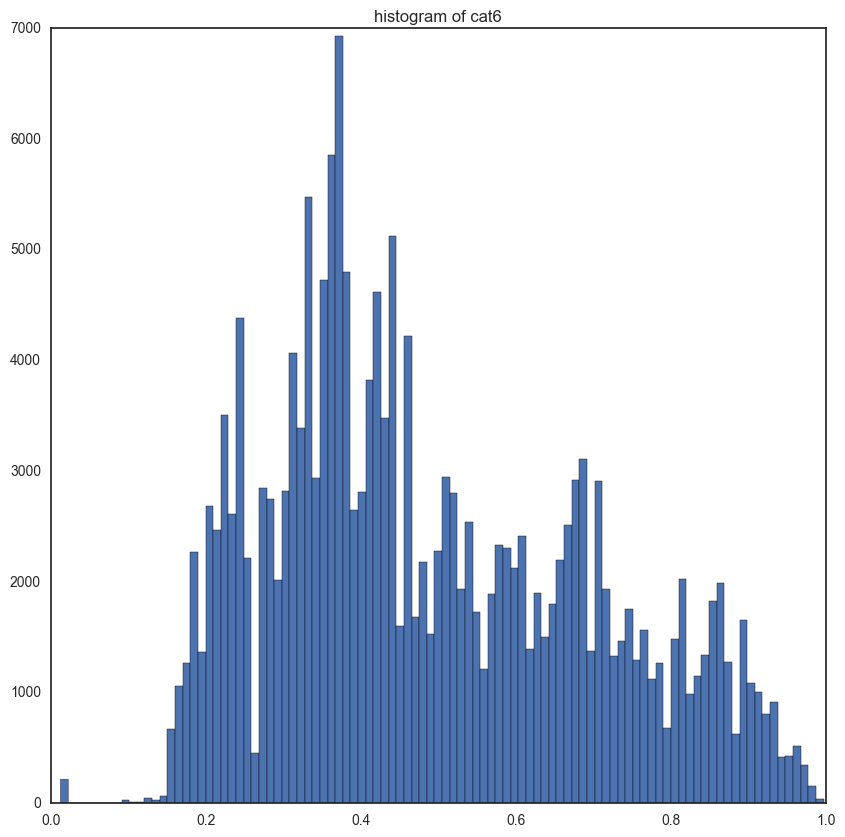

In [35]:
#Histogram of the other continues data 
plt.figure(figsize=(10,10))
plt.hist(dataset.cont6, bins=100)
plt.title("histogram of cat6")
plt.show()

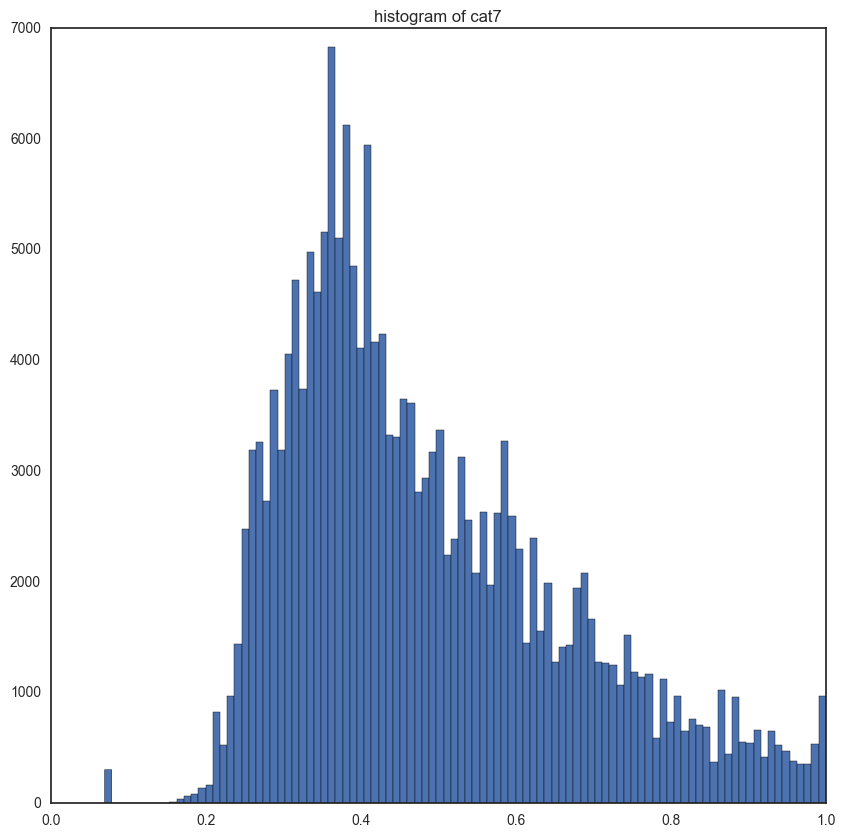

In [34]:
#Histogram of the other continues data 
plt.figure(figsize=(10,10))
plt.hist(dataset.cont7, bins=100)
plt.title("histogram of cat7")
plt.show()

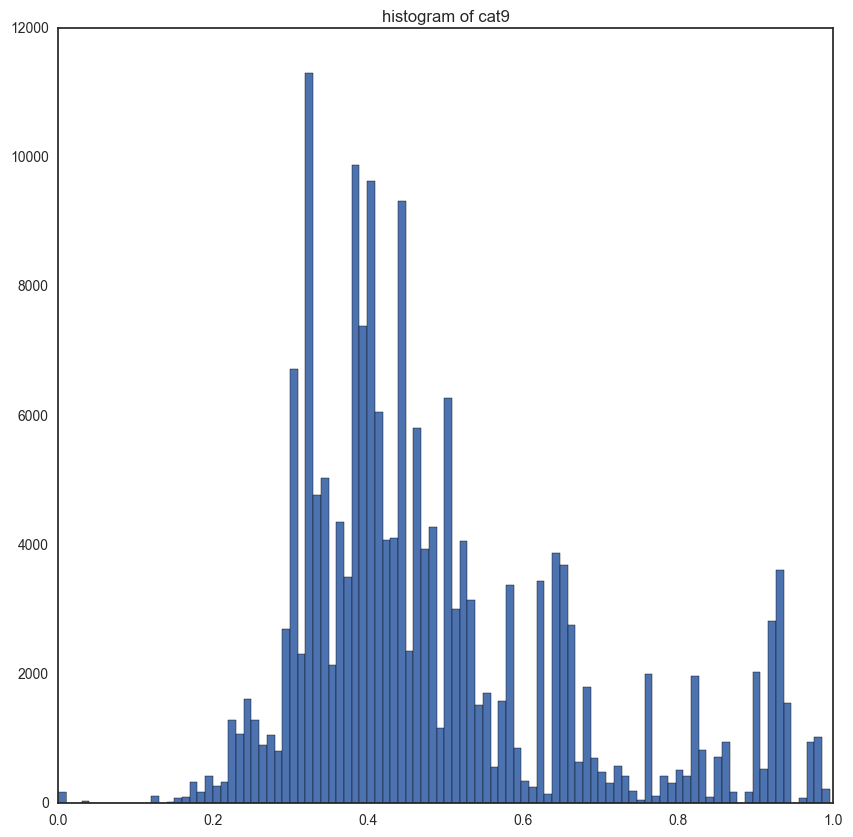

In [32]:
#Histogram of the other continues data 
plt.figure(figsize=(10,10))
plt.hist(dataset.cont9, bins=100)
plt.title("histogram of cat9")
plt.show()

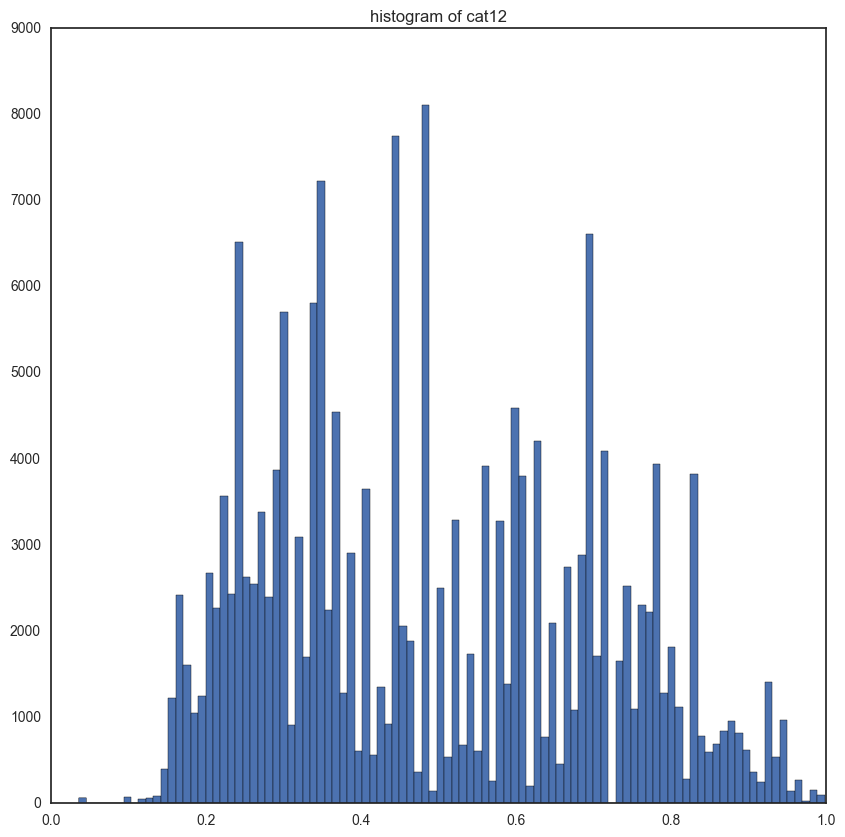

In [33]:
#Histogram of the other continues data 
plt.figure(figsize=(10,10))
plt.hist(dataset.cont12, bins=100)
plt.title("histogram of cat12")
plt.show()

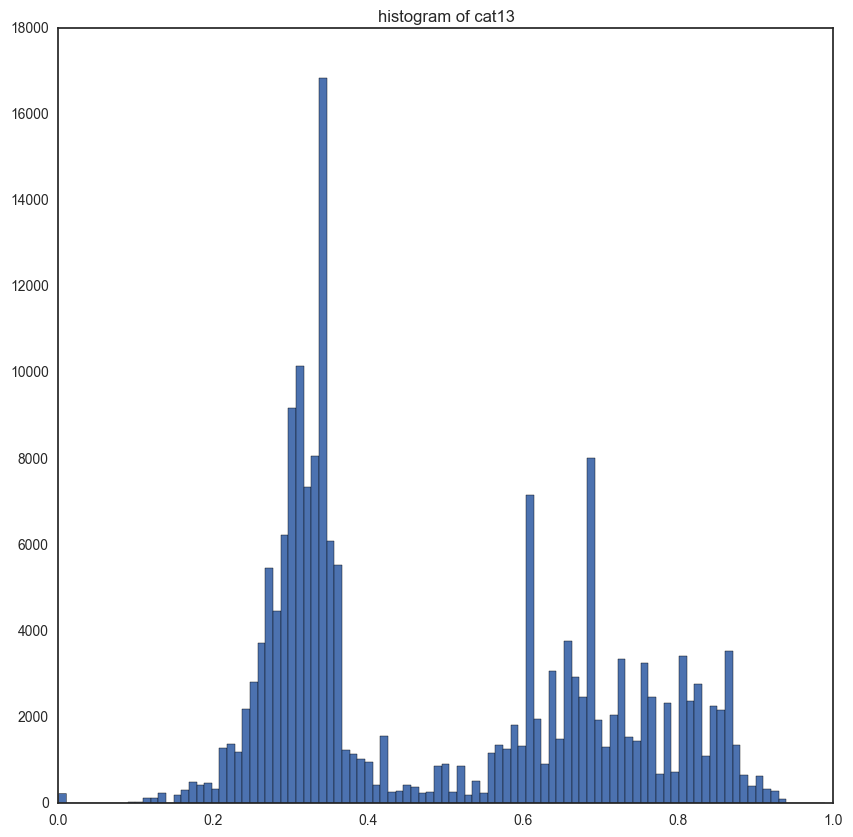

In [31]:
#Histogram of the other continues data 
plt.figure(figsize=(10,10))
plt.hist(dataset.cont13, bins=100)
plt.title("histogram of cat13")
plt.show()

In [7]:
#Here I only analyze the continues data and ingnore the categorical data

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


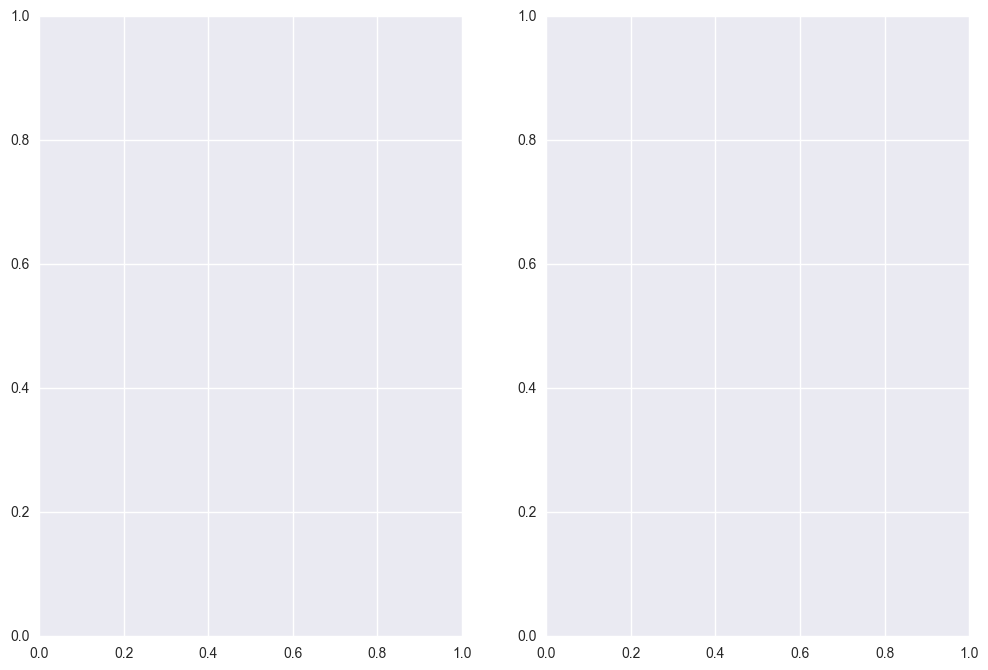

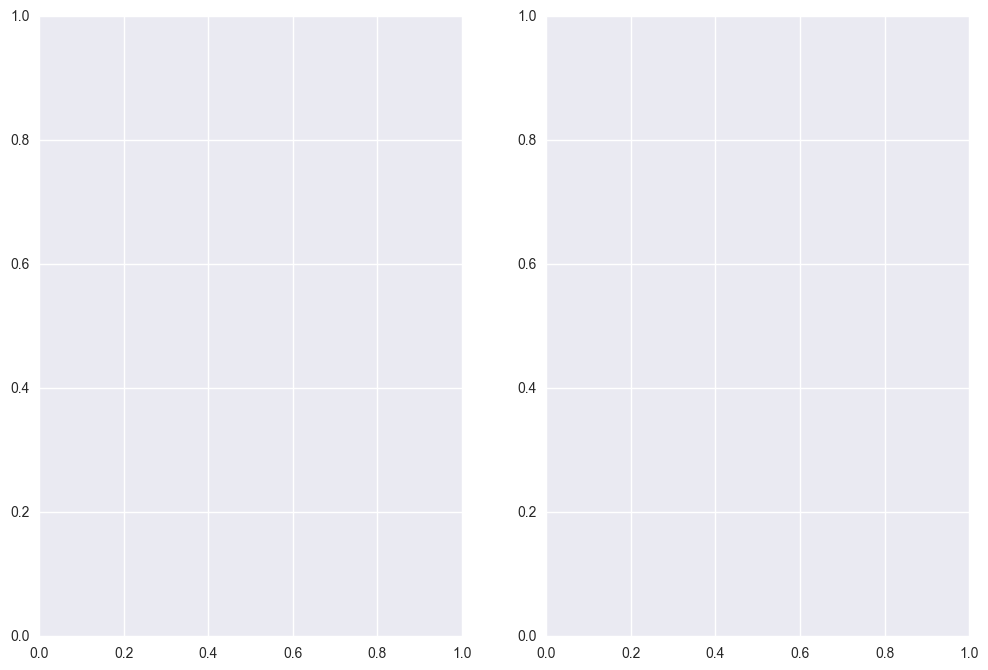

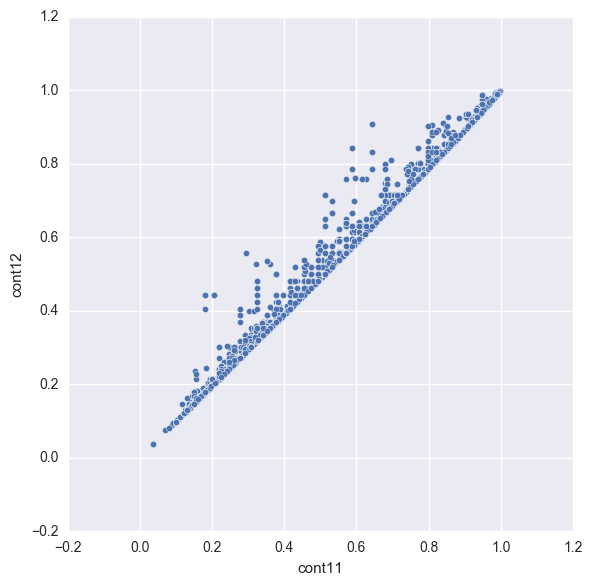

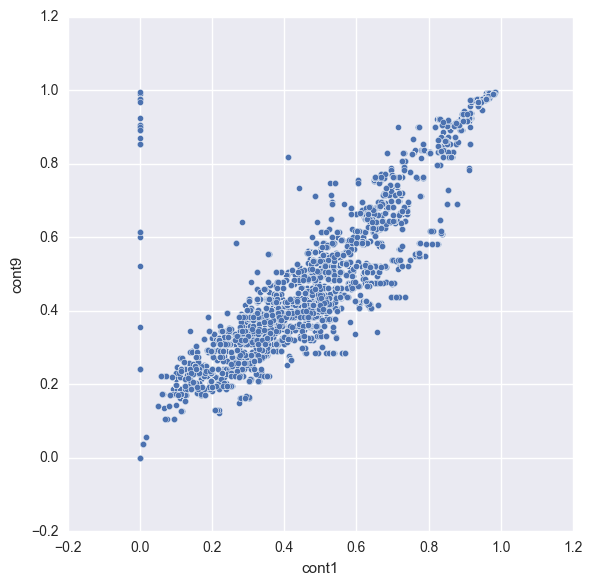

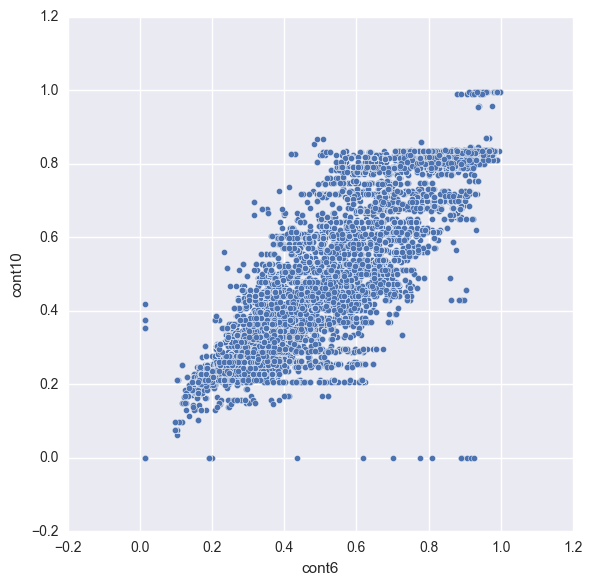

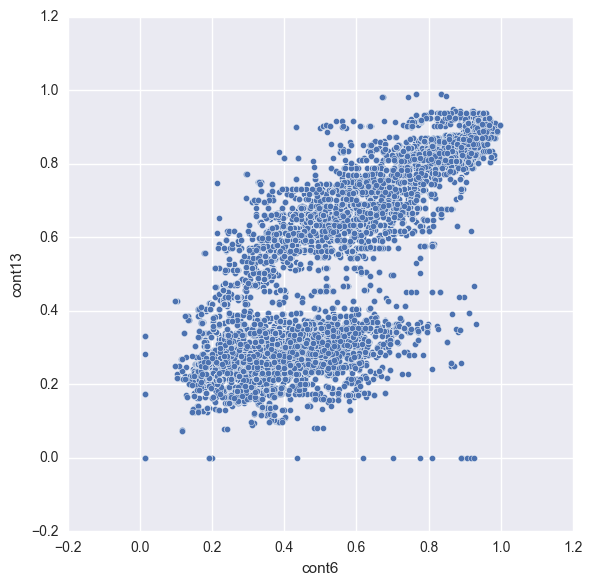

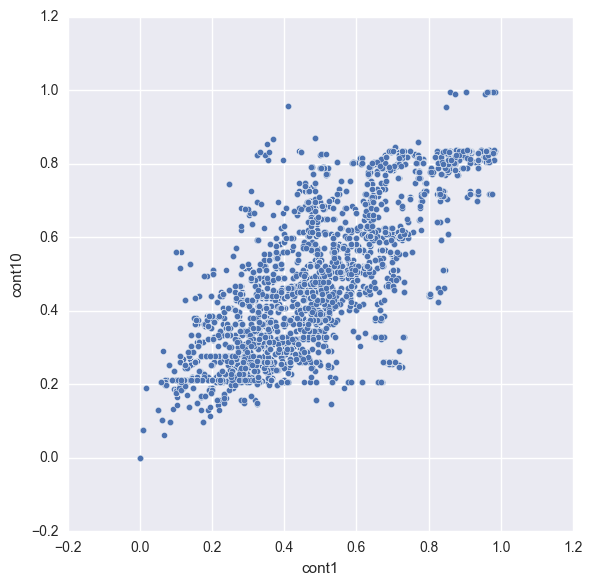

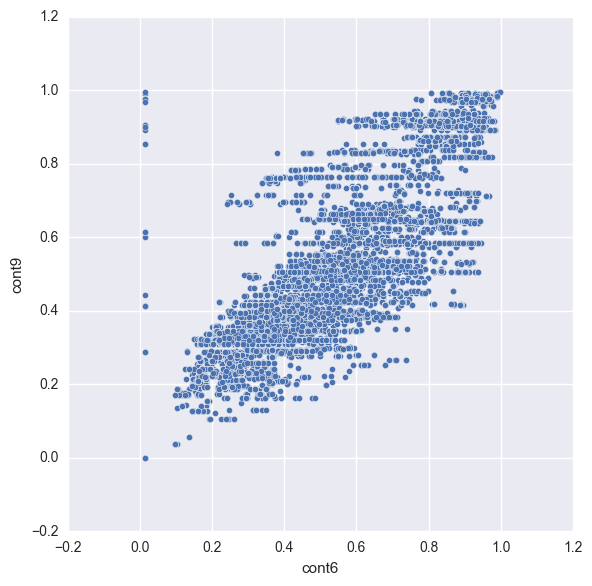

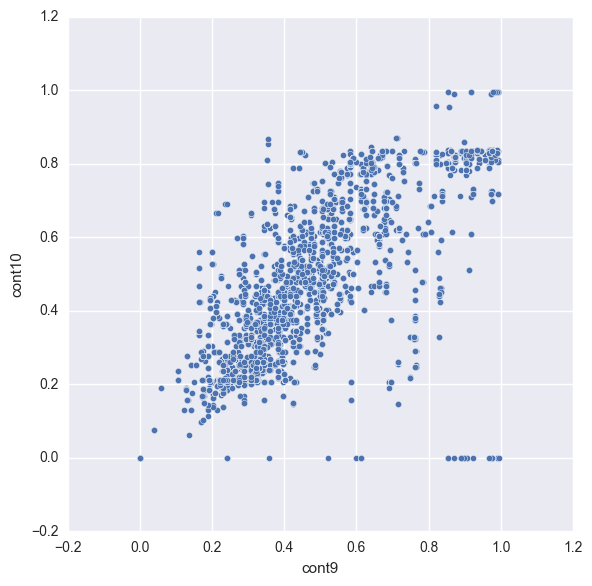

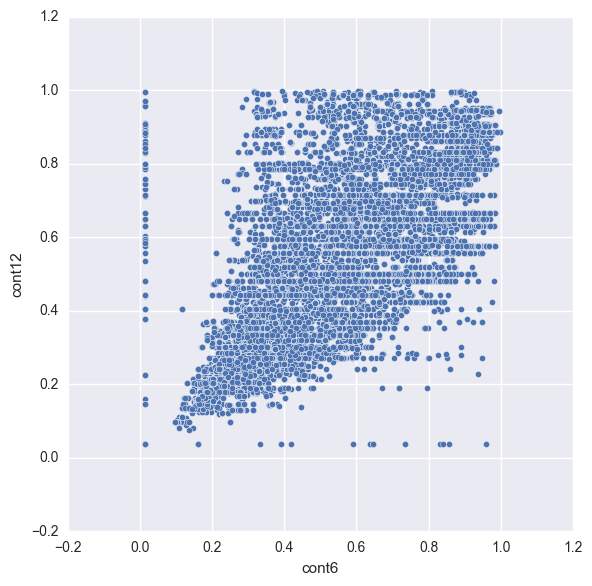

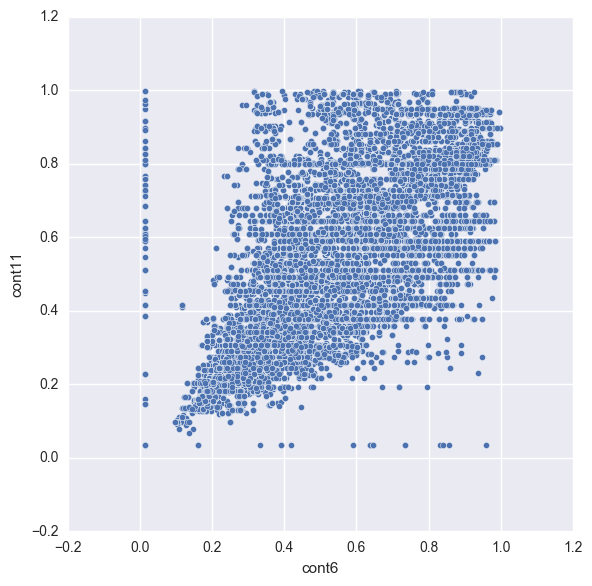

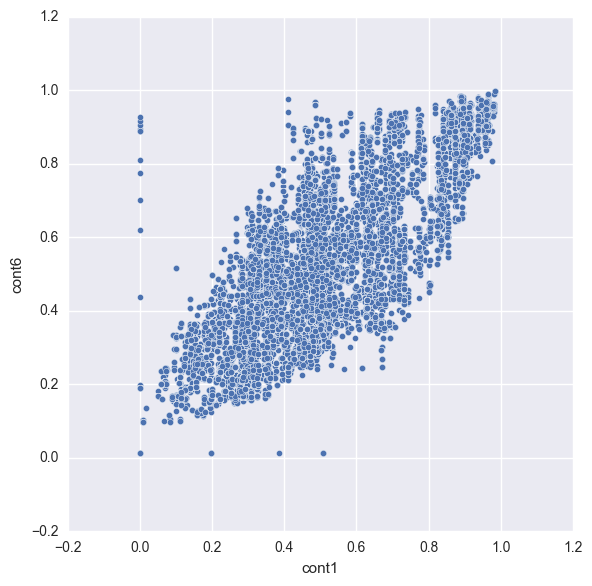

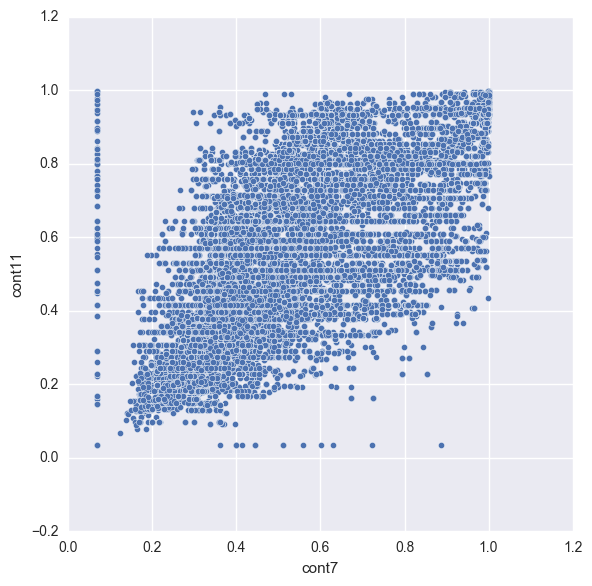

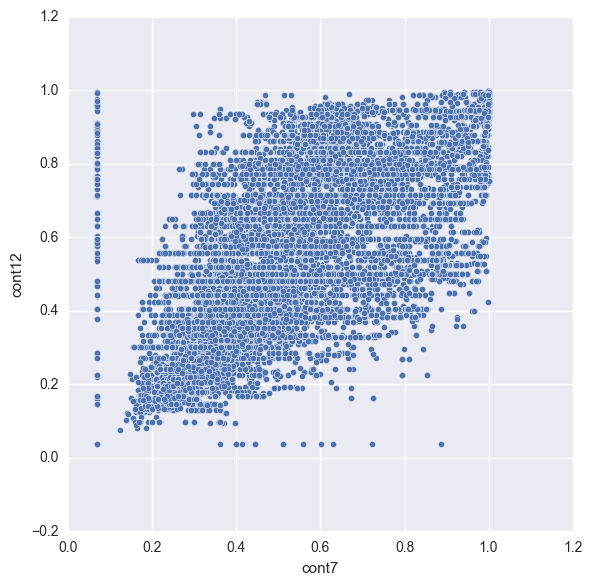

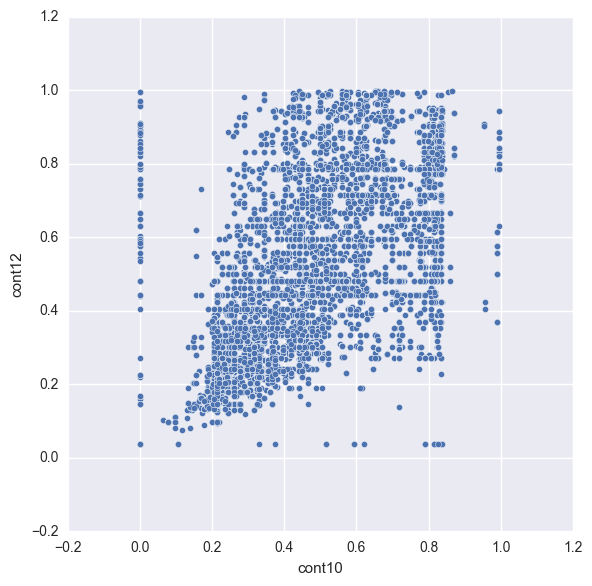

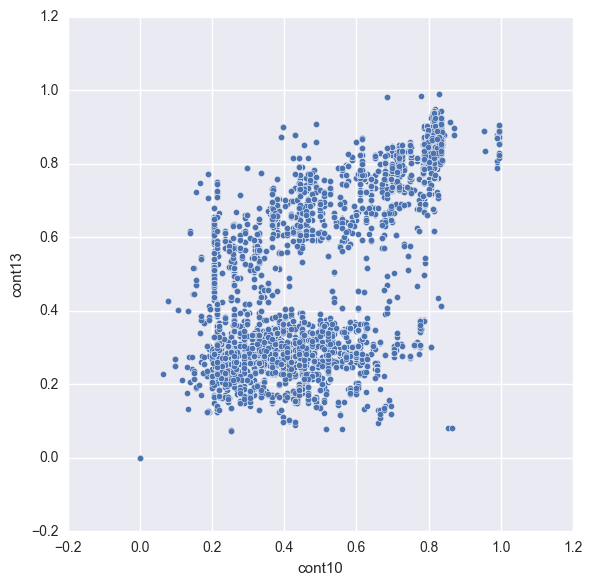

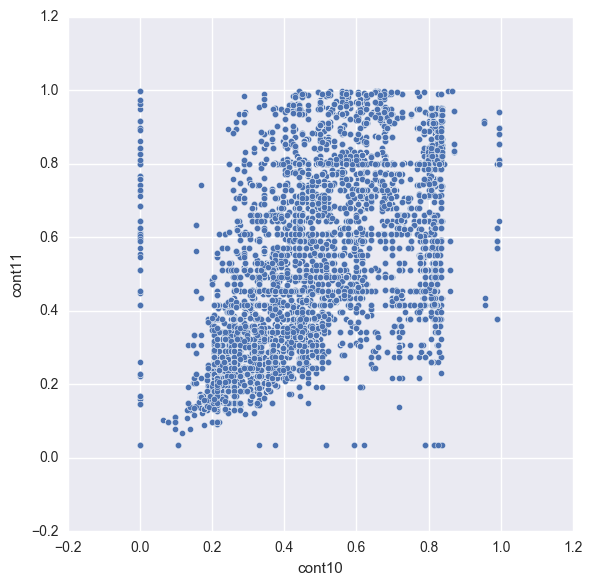

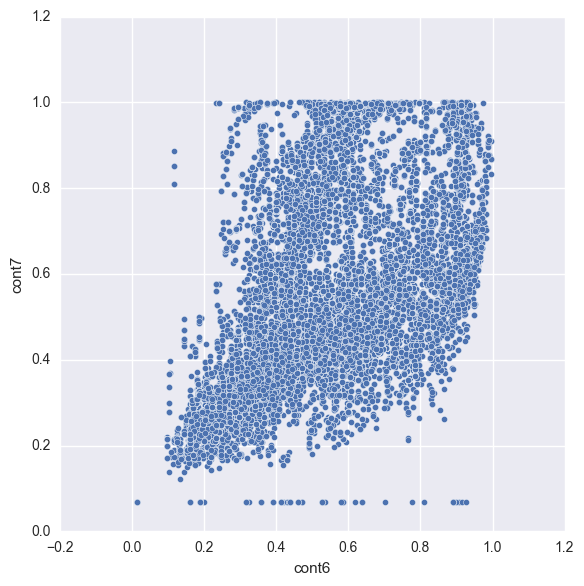

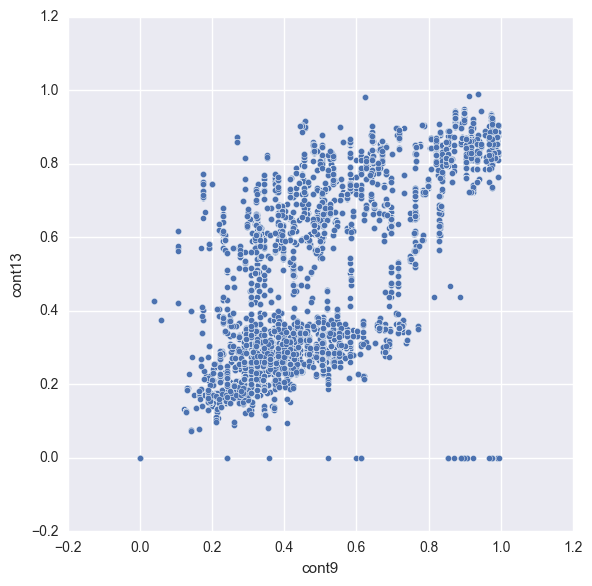

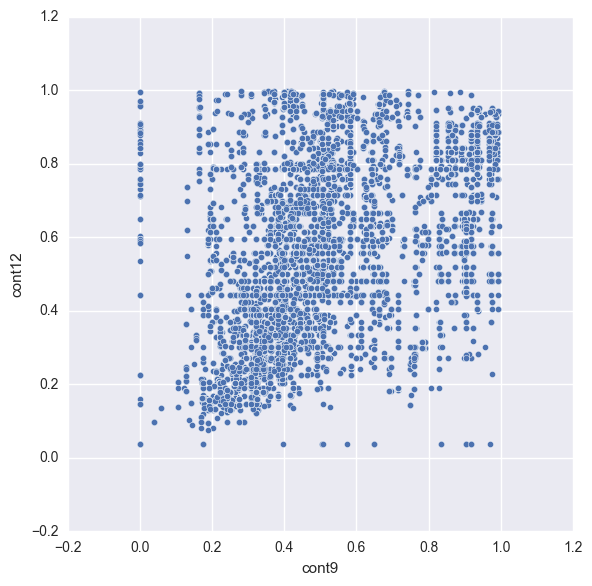

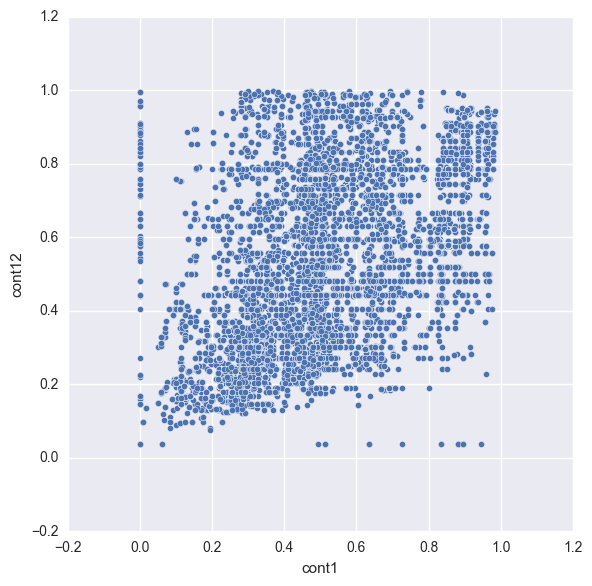

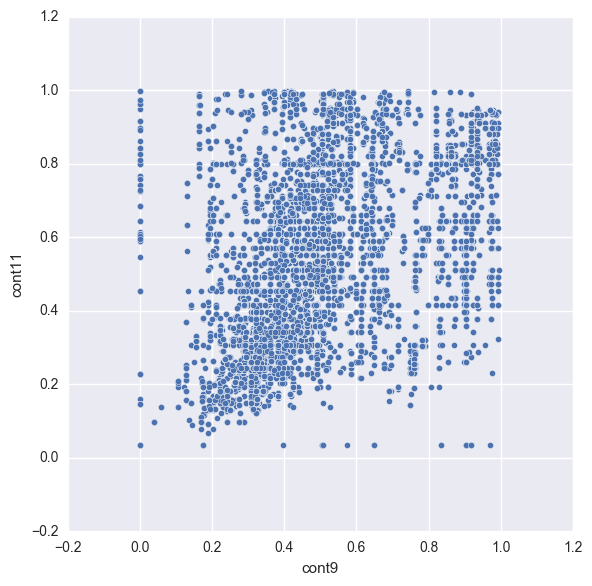

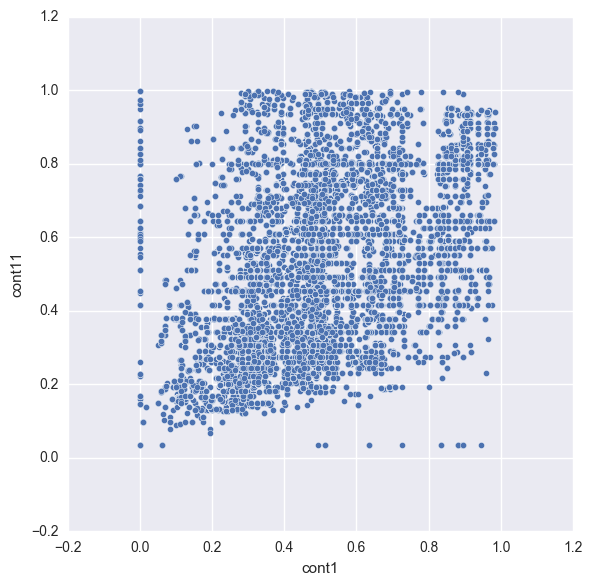

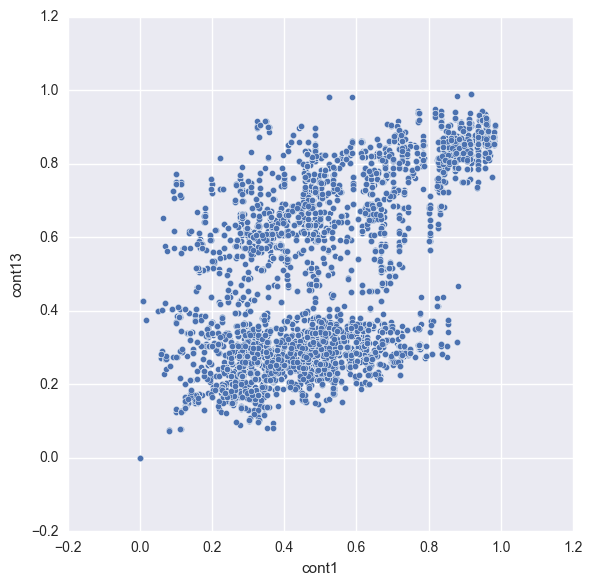

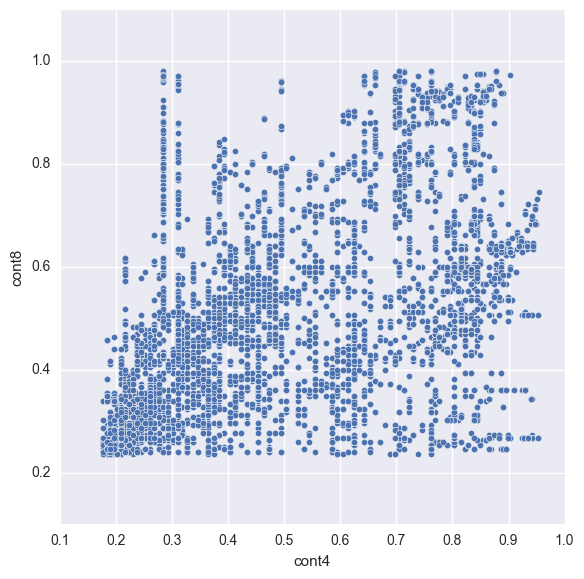

In [8]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(dataset, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()
